This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
try:
    import byron
except ModuleNotFoundError:
    !pip install -U byron
    import byron

C:\Users\giova\AppData\Local\Temp\ipykernel_2360\288499090.py:2: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://cad-polito-it.github.io/byron/paranoia for details]
  import byron


## *Internal* Global References

A reference to a macro in the same tree.

In [2]:
asm_instruction = byron.f.macro(
    "{inst} {reg}, 0x{imm:04x}",
    inst=byron.f.choice_parameter(["add", "sub", "and", "or", "xor"]),
    reg=byron.f.choice_parameter(["ax", "bx", "cx", "dx"]),
    imm=byron.f.integer_parameter(0, 2**16),
)
asm_jmp = byron.f.macro("jne {ref}", ref=byron.f.global_reference("main"))

section_proc = byron.f.sequence(
    [
        byron.f.macro("proc {_node} near:", _label=''),
        byron.f.bunch(asm_instruction, 2),
        byron.f.macro("ret"),
    ],
    name="zap",
)

asm_call = byron.f.macro(
    "call {target}", target=byron.f.global_reference("zap", creative_zeal=1, first_macro=True)
)

main = byron.f.sequence(
    [
        asm_instruction,
        asm_instruction,
        asm_instruction,
        asm_instruction,
        asm_call,
        asm_instruction,
        asm_jmp,
        asm_instruction,
    ],
    name="main",
)

byron.f.as_text(main, {'$dump_node_info'': False'})

TypeError: as_text() takes 1 positional argument but 2 were given

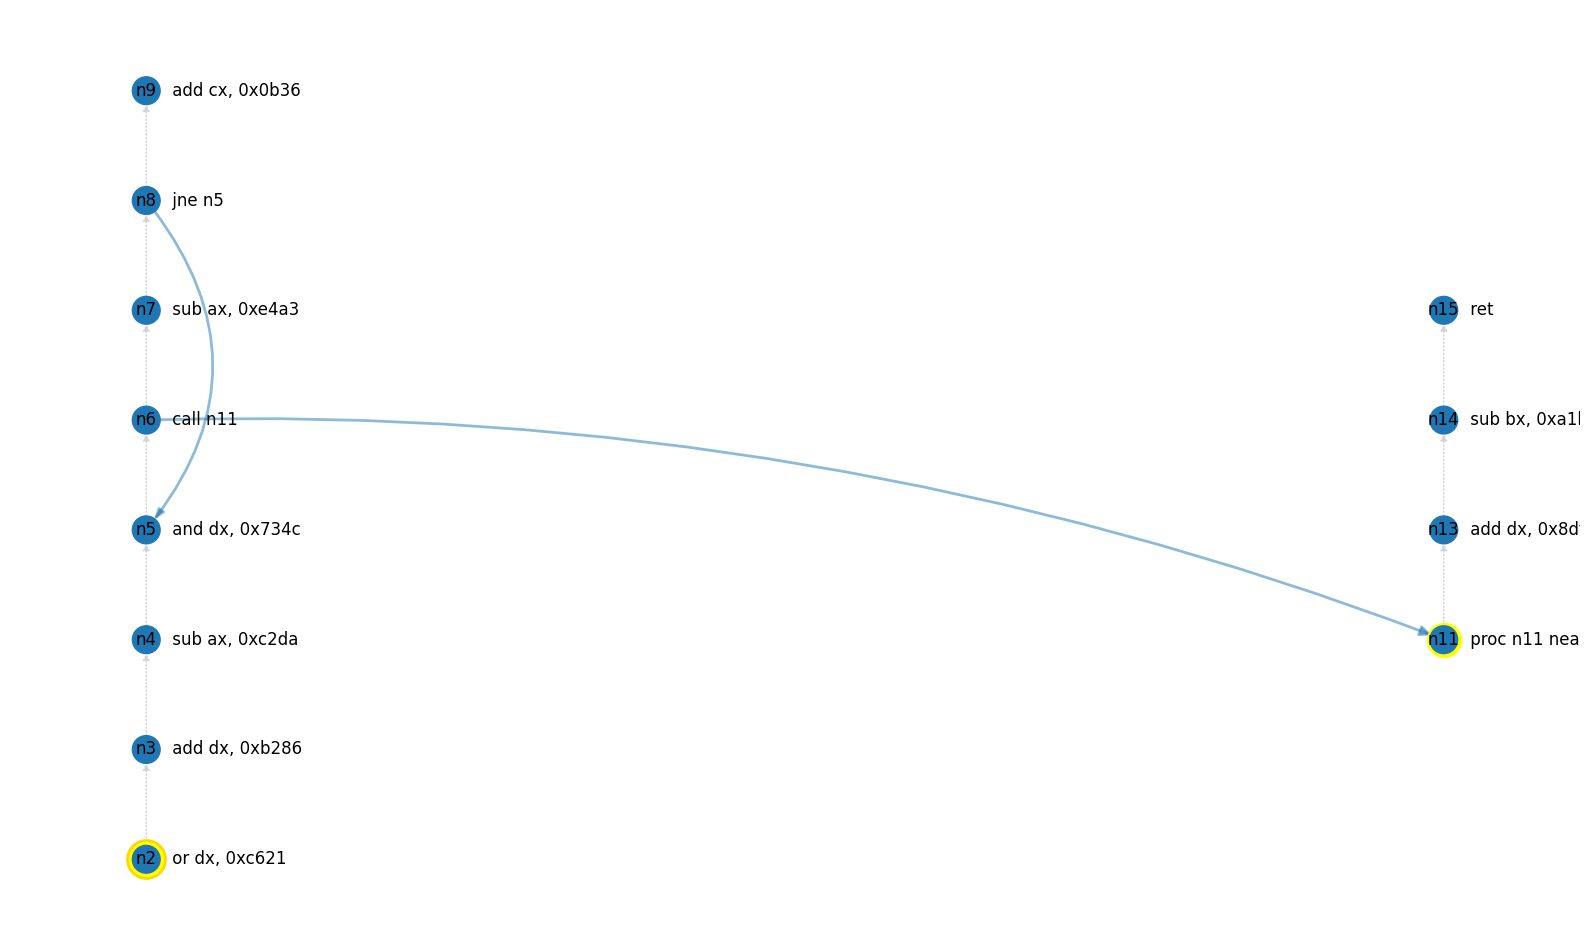

In [3]:
byron.f.as_lgp(main)

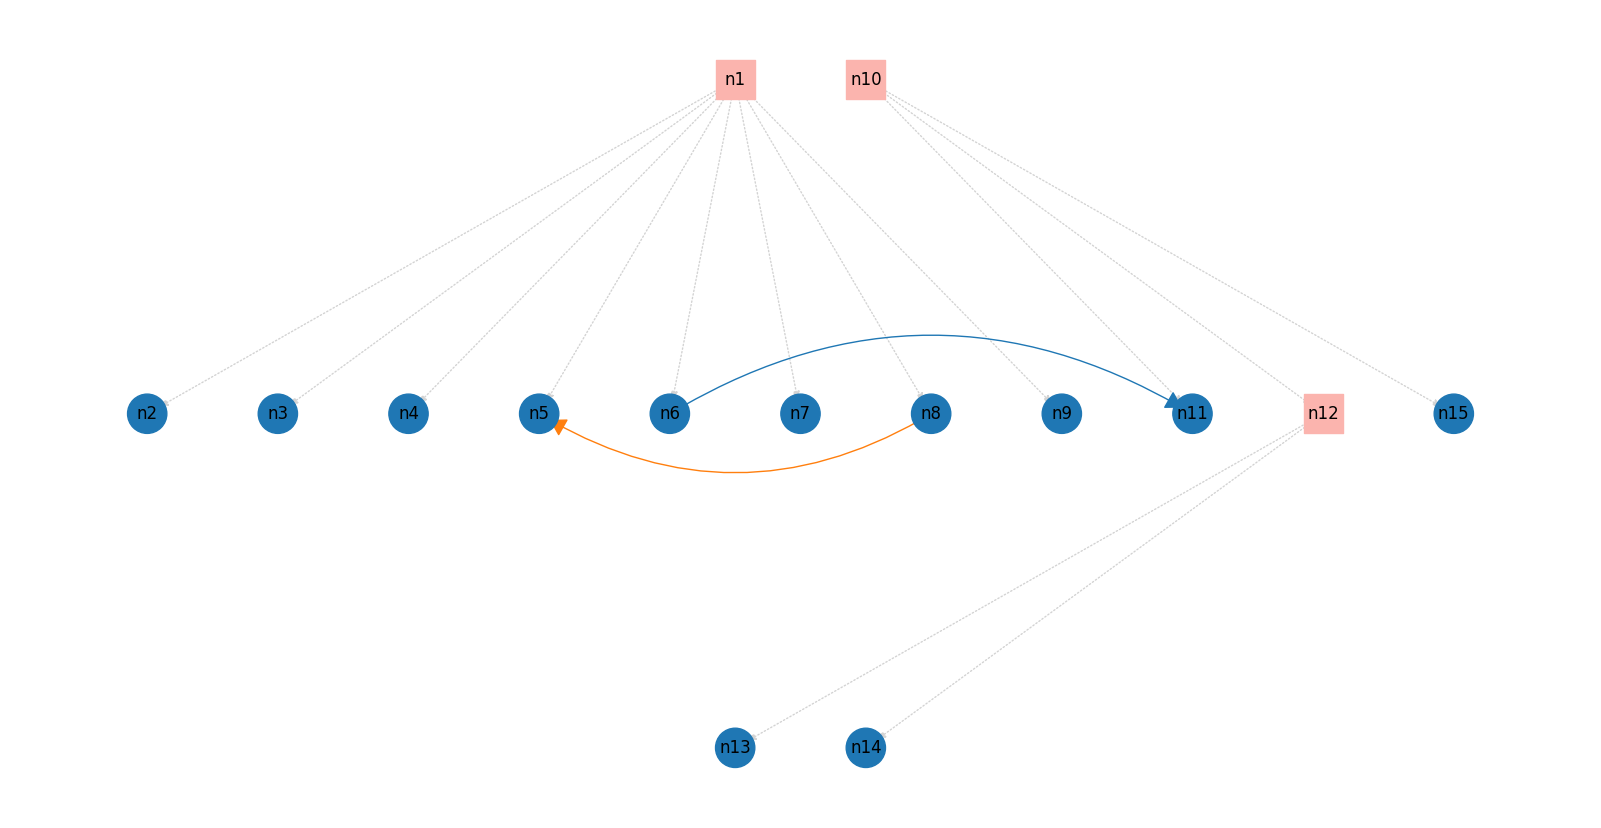

In [4]:
byron.f.as_forest(main)